# HDB Resale Flat Prices

## The objective of this project is to understand the key factors affecting HDB resale prices

### HDBs are Singapore's public apartments and the factors that affect price are: which town is the flat located, the flat type and model, the storey range and floor area of the flat, and the flat's remaining lease

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "D:\Coursera\IBM Machine Learning\HDB/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data = pd.read_csv(filepath)

In [3]:
# Preview
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [17]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

# Check for null values
print(data.isnull().sum())

80374
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']
month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                object
resale_price                  float64
dtype: object
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64
<bound method NDFrame.describe of            month        town  flat_type block        street_name storey_range  

In [5]:
data['month'] =  pd.to_datetime(data['month'],
                              format='%Y-%m').copy()

In [6]:
data_object = data.select_dtypes(include=['object']).copy()
data_object.head()

,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,Improved,61 years 04 months
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,New Generation,60 years 07 months
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,New Generation,62 years 05 months
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,New Generation,62 years 01 month
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,New Generation,62 years 05 months


In [7]:
print(data_object['block'].value_counts().count())
print(data_object['street_name'].value_counts().count())
print(data_object['remaining_lease'].value_counts().count())

2446
548
623


In [8]:
data1 = data.drop(columns = ['block', 'street_name', 'remaining_lease']).copy()
data1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0


In [9]:
print(data1['town'].value_counts())

SENGKANG           6408
WOODLANDS          6019
JURONG WEST        5984
YISHUN             5641
TAMPINES           5235
PUNGGOL            5119
BEDOK              4356
HOUGANG            3848
ANG MO KIO         3613
CHOA CHU KANG      3333
BUKIT PANJANG      3197
BUKIT MERAH        3097
BUKIT BATOK        2953
TOA PAYOH          2646
PASIR RIS          2421
KALLANG/WHAMPOA    2275
QUEENSTOWN         2140
SEMBAWANG          2104
GEYLANG            1928
JURONG EAST        1793
CLEMENTI           1785
SERANGOON          1601
BISHAN             1535
CENTRAL AREA        658
MARINE PARADE       465
BUKIT TIMAH         220
Name: town, dtype: int64


Flats in Sengkang were resold the most number of times, followed by flats in Woodlands then Jurong West

In [10]:
data1["resale_price_per_sqm"] = round ((data1["resale_price"] / data1["floor_area_sqm"]))
data1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_price_per_sqm
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,5273.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,3731.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,3910.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,3897.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,3955.0


In [11]:
est_remaining_lease_yrs = 99 - (2020 - data1["lease_commence_date"])
data1.insert(6, "est_remaining_lease_yrs", est_remaining_lease_yrs)
data1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,est_remaining_lease_yrs,lease_commence_date,resale_price,resale_price_per_sqm
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,58,1979,232000.0,5273.0
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,57,1978,250000.0,3731.0
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,59,1980,262000.0,3910.0
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,59,1980,265000.0,3897.0
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,59,1980,265000.0,3955.0


In [12]:
round(data1.describe())

,floor_area_sqm,est_remaining_lease_yrs,lease_commence_date,resale_price,resale_price_per_sqm
count,80374.0,80374.0,80374.0,80374.0,80374.0
mean,98.0,73.0,1994.0,439316.0,4532.0
std,24.0,13.0,13.0,153390.0,1214.0
min,31.0,45.0,1966.0,140000.0,2090.0
25%,82.0,63.0,1984.0,330000.0,3731.0
50%,95.0,73.0,1994.0,410000.0,4231.0
75%,113.0,82.0,2003.0,515000.0,4931.0
max,249.0,98.0,2019.0,1258000.0,12762.0


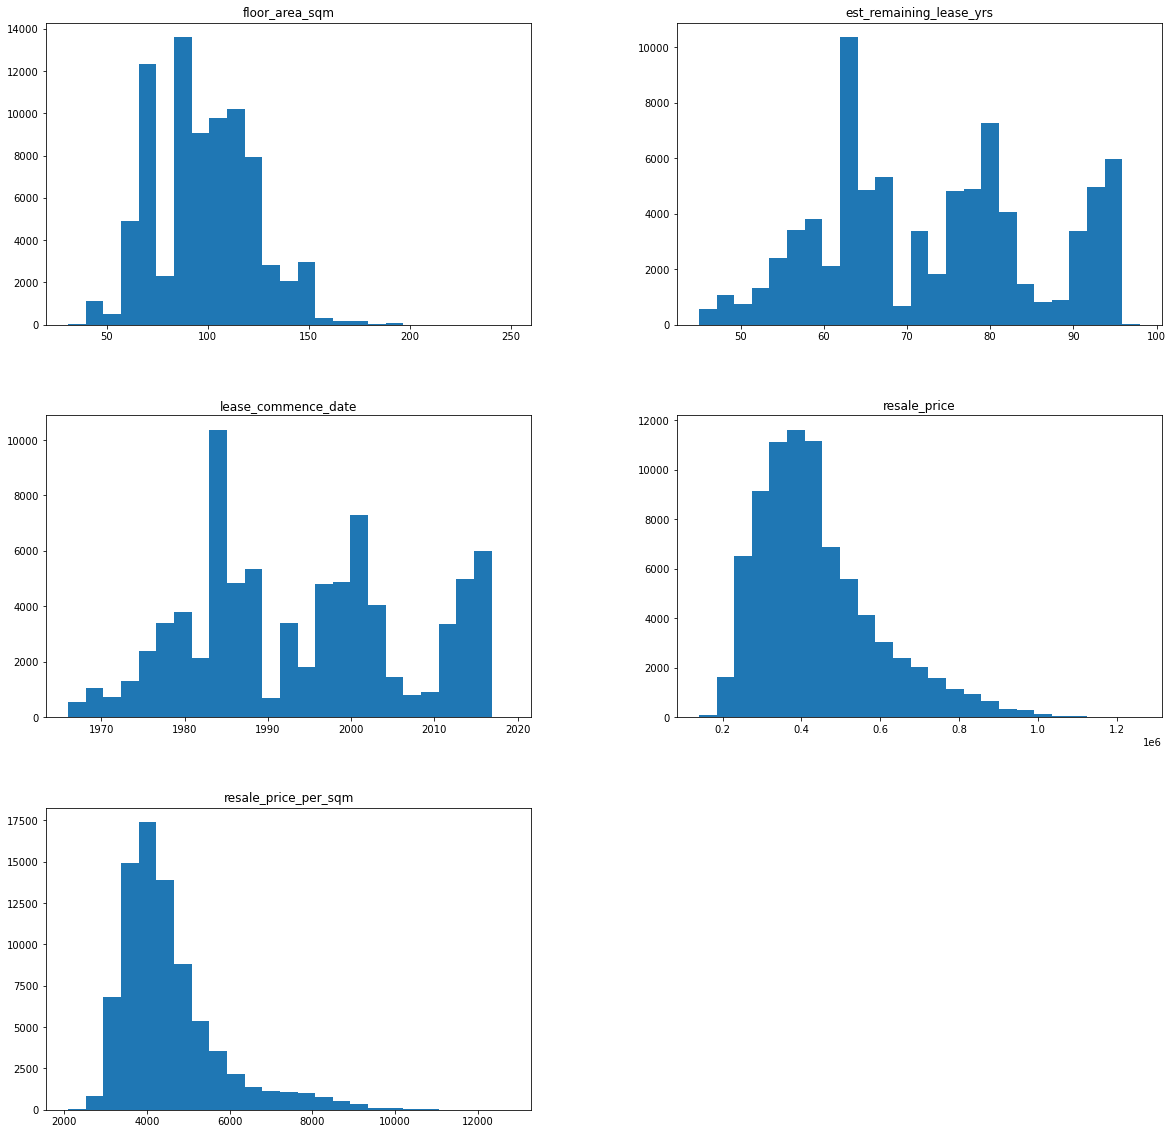

In [13]:
axList = data1.hist(bins=25, grid=False, figsize=(20,20))

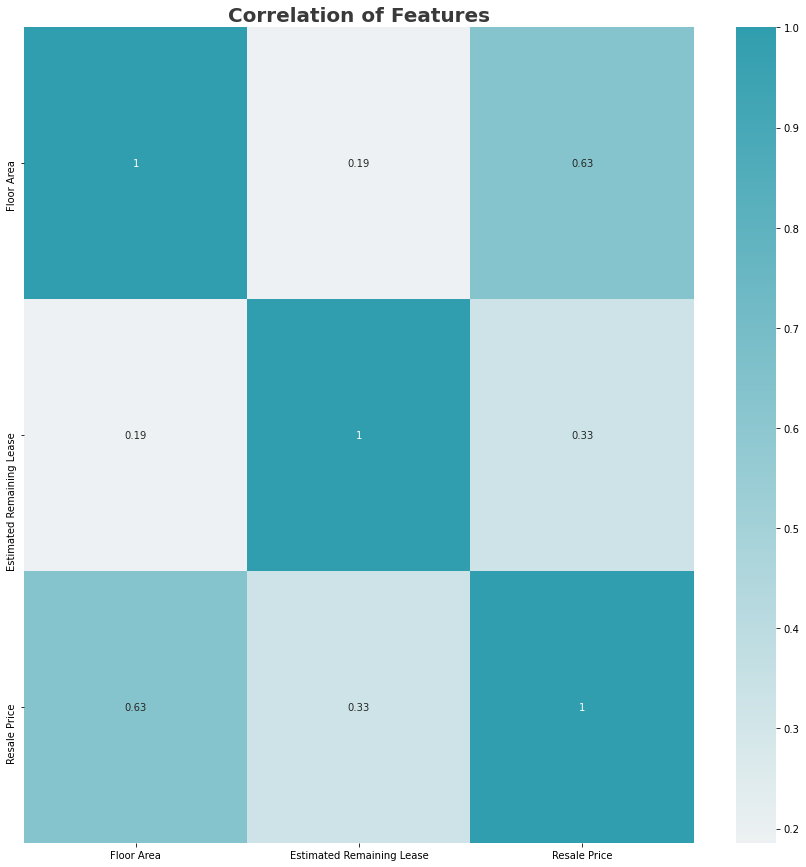

In [15]:
features = data1[['floor_area_sqm', 'est_remaining_lease_yrs', 'resale_price']]
plt.figure(figsize = (15,15))
sns.heatmap(features.corr(), annot = True,
            cmap=sns.light_palette((210, 90, 60), input="husl", as_cmap = True))
ax = plt.gca()
ax.title.set_color('#3a3a3a')
ax.set_xticklabels(['Floor Area', 'Estimated Remaining Lease', 'Resale Price'])
ax.set_yticklabels(['Floor Area', 'Estimated Remaining Lease', 'Resale Price'])
plt.title('Correlation of Features', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.show()

In [16]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data1.to_csv('out.zip', index=False,
             compression=compression_opts)